# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [1]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt
jsonfile=open('yearinfo.json')
loadJson=json.load(jsonfile)
loadJson


{'2010': [{'band_singer': ['Kesha'],
   'song': ['/wiki/Tik_Tok_(song)'],
   'songurl': ['Tik Tok (song)'],
   'ranking': 1,
   'titletext': '"Tik Tok"',
   'url': ['/wiki/Kesha']},
  {'band_singer': ['Lady Antebellum'],
   'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
   'songurl': ['Need You Now (Lady Antebellum song)'],
   'ranking': 2,
   'titletext': '"Need You Now"',
   'url': ['/wiki/Lady_Antebellum']},
  {'band_singer': ['Train (band)'],
   'song': ['/wiki/Hey,_Soul_Sister'],
   'songurl': ['Hey, Soul Sister'],
   'ranking': 3,
   'titletext': '"Hey, Soul Sister"',
   'url': ['/wiki/Train_(band)']},
  {'band_singer': ['Katy Perry', 'Snoop Dogg'],
   'song': ['/wiki/California_Gurls'],
   'songurl': ['California Gurls'],
   'ranking': 4,
   'titletext': '"California Gurls"',
   'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
  {'band_singer': ['Usher (musician)', 'Will.i.am'],
   'song': ['/wiki/OMG_(Usher_song)'],
   'songurl': ['OMG (Usher song)'],
   'ranking': 5,


In [2]:
loadJson.keys()#range

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

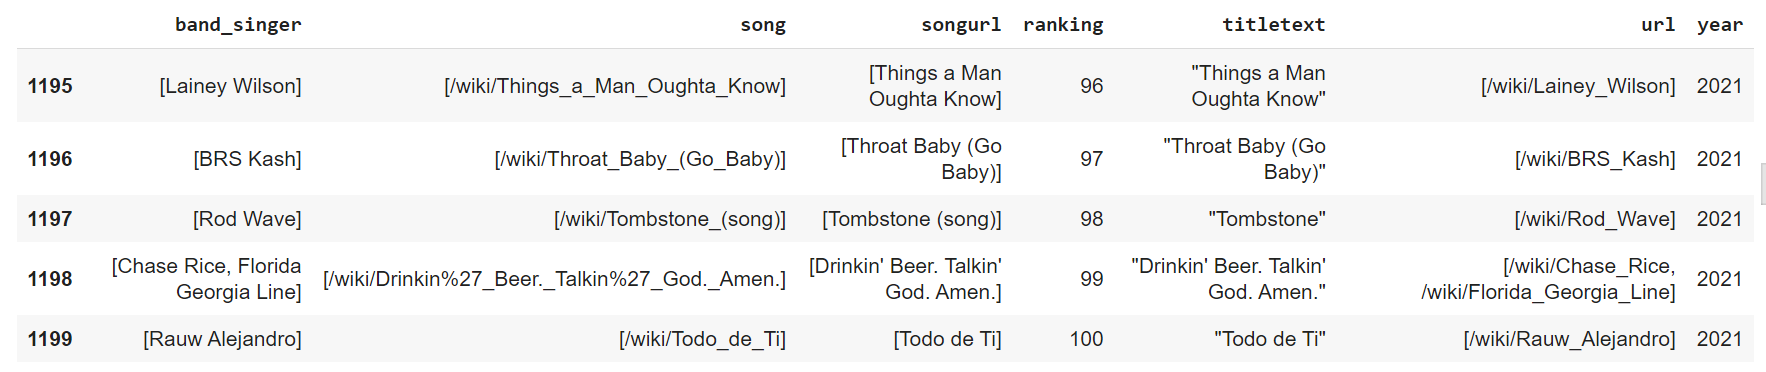

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [3]:
#write your code here
#creating column and updating data in list(data)

column = list(loadJson['2015'][0].keys())+(['year'])
data = []
for key, value in loadJson.items():
    for i in value:
        temp = list(i.values())+[key]
        data.append(temp)

#creating data frame 
df = pd.DataFrame(data,columns=column)
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [4]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [5]:
#converting list values into string(object)
def callValue(list_name):
    value = list_name[0]
    return value
df['band_singer'] = df.band_singer.map(callValue)
df['song'] = df.song.map(callValue)
df['songurl'] = df.songurl.map(callValue)
df['url'] = df.url.map(callValue)
df.head()


band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [6]:
#Write your program and plot bar graph
df.value_counts(subset=['band_singer']).loc[lambda x:x > 15]
#Singers on this chart should have appeared at-least more than 15 times

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

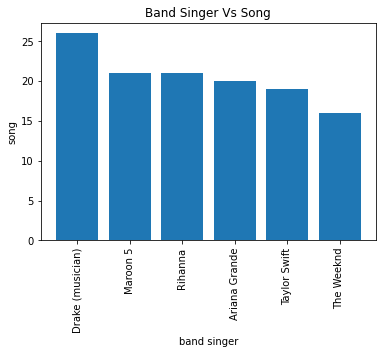

In [7]:
#Write your program and plot bar graph
#bar-plotting of the most prolific singers
y = df.band_singer.value_counts().loc[lambda x:x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.title('Band Singer Vs Song')
plt.show()


**Question: Who is the most profilic singer?**


Drake (musician) who have appeared   26 times 

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [14]:
#write your code here
#assigning each song a score 101 - ranking
df['score'] = [101-i for i in df['ranking']]
df.head(10)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   
5             B.o.B                     /wiki/Airplanes_(song)   
6            Eminem                 /wiki/Love_the_Way_You_Lie   
7         Lady Gaga                          /wiki/Bad_Romance   
8         Taio Cruz            /wiki/Dynamite_(Taio_Cruz_song)   
9         Taio Cruz                     /wiki/Break_Your_Heart   

                               songurl  ranking               titletext  \
0                       Tik Tok (song)        1               "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2          "Need You Now"   
2                     Hey, Soul Sister        3      "Hey, Soul Sister"   
3                     California Gurls        4      "California Gurls"   
4                     OMG (Usher song)        5                   "OMG"   
5                     Airplanes (song)        6             "Airplanes"   
6                 Love the Way You Lie        7  "Love the Way You Lie"   
7                          Bad Romance        8           "Bad Romance"   
8            Dynamite (Taio Cruz song)        9              "Dynamite"   
9                     Break Your Heart       10      "Break Your Heart"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96  
5             /wiki/B.o.B  2010     95  
6            /wiki/Eminem  2010     94  
7         /wiki/Lady_Gaga  2010     93  
8         /wiki/Taio_Cruz  2010     92  
9         /wiki/Taio_Cruz  2010     91

In [9]:
#grouping all of a singers songs together
dis_singre_score = {}
for singer, songs in df.groupby('band_singer'):
    dis_singre_score[singer] = songs.score.sum()

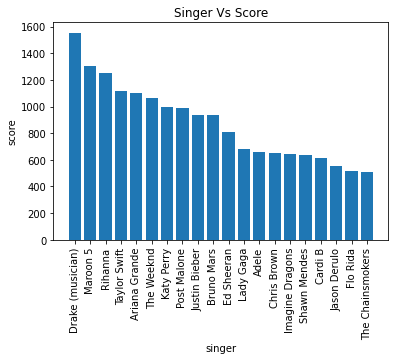

In [10]:
#ploatting bar graph for SInger vs Score
y = pd.Series(data=dis_singre_score.values(), index=dis_singre_score.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.title('Singer Vs Score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

There is change in position from  4th place for singer name. It happened so beacuse 
first graph was plotted based on number of apperence of the siger name where as  in 
the second graph it was plotted based on score of sinnger 


## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

who is popular singer based on appreance of repeatation in 2015?

In [11]:
#write your solution from here

In [29]:
df.year = df.year.astype('int')
df.dtypes
year = df.groupby('year')
year= year.get_group(2015)
repeatation = year['band_singer'].value_counts(sort = True)[:20]


pandas.core.series.Series

Text(0.5, 1.0, 'No of Repeatation vs Singers ')

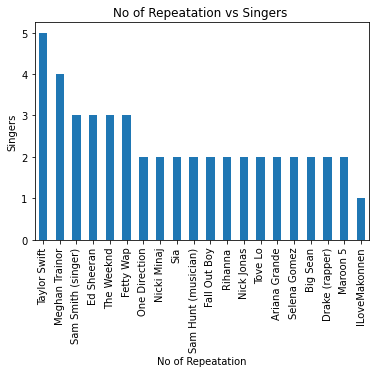

In [34]:
repeatation = pd.DataFrame(freq)
repeatation['band_singer'].plot(kind = "bar")
plt.ylabel('No of Repeatation')
plt.ylabel('Singers')
plt.title('No of Repeatation vs Singers ')

## SUBMISSION DATE: 2nd April 2022 